**Nicholas Saunders**  
Cosmology HW 4 Part II

In [1]:
import matplotlib.pyplot as pl
from matplotlib.patches import Ellipse
import matplotlib.image as mpimg
import numpy as np
from scipy import misc
pl.style.use('ggplot')
%matplotlib inline

In [2]:
M_sun = 1.989e30 # kg
c = 3e8 * 3.2e-23 # Mpc/s
G = 6.67e-11 * (3.2e-23 ** 3) * M_sun # Mpc^3 / M_sun / s^2 

Lens equation:  
$$\beta = \theta - \frac{D_{LS}}{D_{L}D_{S}} \frac{4GM}{c^2 \theta}$$

Solving for $\theta$ yields:
$$\theta_{1,2} = \frac{1}{2}\left [\beta \pm \sqrt{\beta^2+4\theta_E^2} \right ]$$

In this case, $\beta=0$, and the lens equation can be simplified to  
$$\theta_E=\sqrt{\frac{4GM}{c^2}\frac{D_{LS}}{D_{L}D_{S}}}.$$

In [3]:
def mag(e_ring,theta):
    return 1/(1 - e_ring **4 / theta ** 4)

def theta(beta, e_ring):
    return (0.5) * (beta + np.sqrt((beta**2) + 4*(e_ring**2))),(0.5) * (beta - np.sqrt((beta**2) + 4*(e_ring**2)))

Radius of the Einstein ring for this system: 0.000168 radians
Radius of the Einstein ring for this system: 34.70 arcseconds
Pixel radius of the Einstein ring for this system: 168.23 pixels


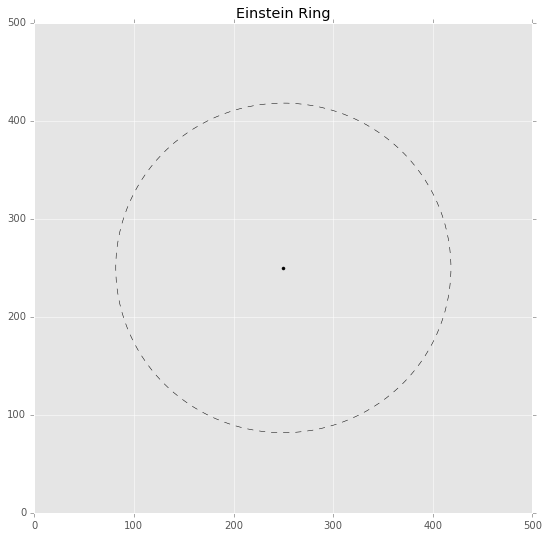

In [4]:
def einsteinRing(DL,DS,DLS,M):
    e_ring = np.sqrt((4*G*M*DLS)/(c**2 * DL * DS))

    pixel = 0.000001
    pix_ring = e_ring / pixel

    print("Radius of the Einstein ring for this system: %.6f radians" % e_ring)
    print("Radius of the Einstein ring for this system: %.2f arcseconds" % (e_ring * 180. * 3600. / np.pi))
    print("Pixel radius of the Einstein ring for this system: %.2f pixels" % pix_ring)    

    fig,ax = pl.subplots(1,1)
    ax.set_xlim(0,500)
    ax.set_ylim(0,500)
    fig.tight_layout()
    fig.set_size_inches(8,8)

    ring = pl.Circle((250,250), radius=pix_ring, linestyle="--",color='k', fill=False)
    ax.plot(250,250,'k.')
    ax.add_patch(ring);
    ax.set_title('Einstein Ring');
    
    return pix_ring,e_ring
    
DL = 5.0 # Mpc
DLS = 5.0 # Mpc
DS = 10.0 # Mpc
M = 1.5e12 # solar masses

pix_ring,e_ring = einsteinRing(DL, DS, DLS, M)

Using similar triangles, we can compute new coordinates on the lens plane for the values at the source plane.

$$\frac{\beta}{\theta}=\frac{x'}{x}=\frac{y'}{y}$$
$$x'=\frac{\beta}{\theta}x,\hspace{1cm} y' = \frac{\beta}{\theta}y$$

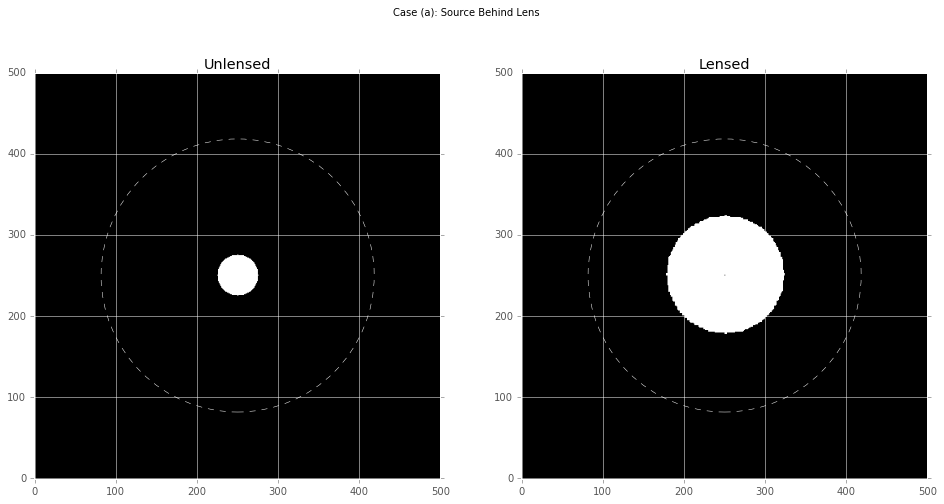

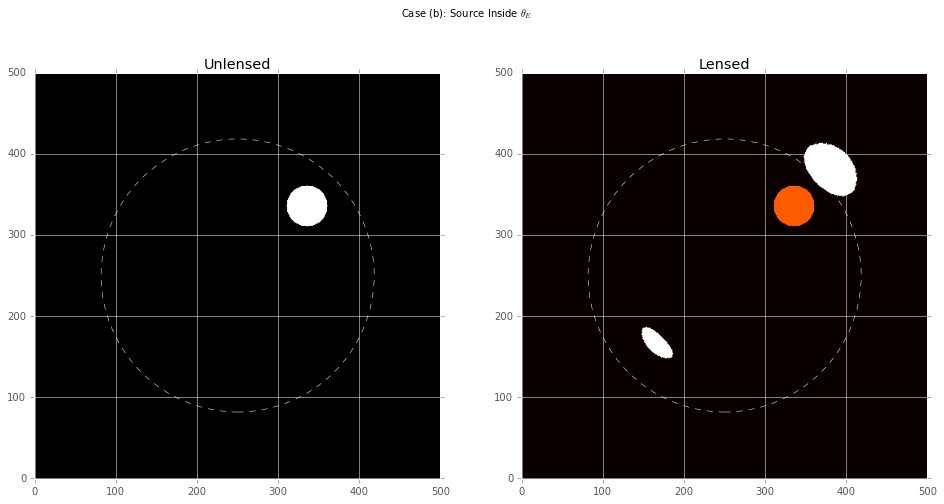

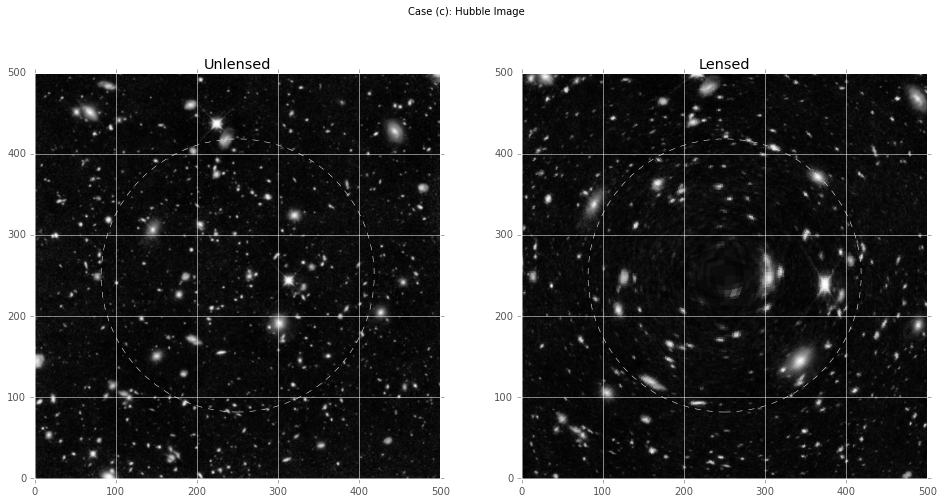

In [5]:
def produceLens(S,title,status):
    '''
    Takes an image and plot title as a parameters
    and creates a lensed image for the Einstein
    radius calculated above.
    '''

    #create blank image arrays
    lensed1 = np.zeros((500,500))
    lensed2 = np.zeros((500,500))

    for i in range(500):
        for j in range(500):
            beta = np.sqrt((i - 250)**2 + (j - 250)**2)
            t1,t2 = theta(beta,pix_ring) # calculate theta values
            if beta != 0:
                
                # calculate x and y coordinates on image plane
                # for corresponding lensed values
                xc = [(beta/t1)*(i-250), (beta/t2)*(i-250)]
                yc = [(beta/t1)*(j-250), (beta/t2)*(j-250)]
                
                # map new values to empty image arrays
                lensed1[i,j] = S[int(xc[0]+250),int(yc[0]+250)]
                if abs(xc[1]+250) > 500. or abs(yc[1]+250) > 500. or status != 0:
                    continue    
                elif (i > 250) or (j > 250):
                    continue                      
                else:
                    lensed2[i,j] = S[int(xc[1]+250),int(yc[1]+250)]
    
    lensed = (lensed1 + lensed2) # combine lenses
    
    # plot results
    fig,ax = pl.subplots(1,2)
    fig.set_size_inches(16,8)
    ring1 = pl.Circle((250,250), radius=pix_ring, linestyle="--",color='w', fill=False)
    ring2 = pl.Circle((250,250), radius=pix_ring, linestyle="--",color='w', fill=False)    
    ax[0].imshow(S,cmap='gray',origin='lower');
    ax[0].add_patch(ring1)
    ax[0].set_title('Unlensed');
    ax[1].imshow(lensed,cmap='gray',origin='lower');
    if status == 0:
        S = S /2. # rescale S to change color
        ax[1].imshow(lensed+S,cmap='hot',origin='lower');
    else:
        ax[1].imshow(lensed,cmap='gray',origin='lower');
    ax[1].add_patch(ring2);
    ax[1].set_title('Lensed');
    fig.suptitle(title);
    
S1 = np.zeros((500,500))
S2 = np.zeros((500,500))
beta_dist = np.zeros((500,500))

# import Hubble image and resize to 500x500 pixels
S_img = mpimg.imread('img.jpg')[:,:,0]
S_img = misc.imresize(S_img,0.3125)

# populate test images with values
for i in range(500):
    for j in range(500):
        beta_dist[i][j] = np.sqrt((250 - i)**2 + (250 - j)**2)
        if beta_dist[i][j] <= 25:
            S1[i][j] = 1000 # behind lens
            S2[i+85][j+85] = 1000 # just inside einstein radius

produceLens(S1,'Case (a): Source Behind Lens',1)
produceLens(S2,'Case (b): Source Inside $\\theta_E$',0)
produceLens(S_img,'Case (c): Hubble Image',1)